Gökçe Şahin 090190306 sahingo19@itu.edu.tr

In [64]:
import gzip
import json
import requests
import tarfile

import librosa
import librosa.display

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pyvis.network as pn

from io import BytesIO
from IPython.display import Audio
from collections import Counter

# MAT381E, HW4

## Q1

For this question we are going to use [Amazon Fine Foods reviews](http://snap.stanford.edu/data/web-FineFoods.html) from [Stanford Network Analysis Project (SNAP)](http://snap.stanford.edu/index.html). The dataset is very large (Approximately 500K entries).

Here is a sample of the data:

    product/productId: B001E4KFG0
    review/userId: A3SGXH7AUHU8GW
    review/profileName: delmartian
    review/helpfulness: 1/1
    review/score: 5.0
    review/time: 1303862400
    review/summary: Good Quality Dog Food
    review/text: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

    product/productId: B00813GRG4
    review/userId: A1D87F6ZCVE5NK
    review/profileName: dll pa
    review/helpfulness: 0/0
    review/score: 1.0
    review/time: 1346976000
    review/summary: Not as Advertised
    review/text: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

    product/productId: B000LQOCH0
    review/userId: ABXLMWJIXXAIN
    review/profileName: Natalia Corres "Natalia Corres"
    review/helpfulness: 1/1
    review/score: 4.0
    review/time: 1219017600
    review/summary: "Delight" says it all
    review/text: This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful. I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardro be" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.


**Step 1:** Ingest the data as a dictionary as follows. You are going to have to write specific python code for injestion. I know no library for this purpose.

In [65]:
[{'product/productId': 'B001E4KFG0',
  'review/userId': 'A3SGXH7AUHU8GW',
  'review/profileName': 'delmartian',
  'review/helpfulness': '1/1',
  'review/score': 5.0,
  'review/time': 1303862400,
  'review/summary': 'Good Quality Dog Food',
  'review/text': 'I have bought several of the Vitality canned dog food products and have found them \
  all to be of good quality. The product looks more like a stew than a processed meat and it smells better. \
  My Labrador is finicky and she appreciates this product better than  most.'},
 {'product/productId': 'B00813GRG4',
  'review/userId': 'A1D87F6ZCVE5NK',
  'review/profileName': 'dll pa',
  'review/helpfulness': '0/0',
  'review/score': 1.0,
  'review/time': 1346976000,
  'review/summary': 'Not as Advertised',
  'review/text': 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually \
  small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'},
 {'product/productId': 'B000LQOCH0',
  'review/userId': 'ABXLMWJIXXAIN',
  'review/profileName': 'Natalia Corres "Natalia Corres"',
  'review/helpfulness': '1/1',
  'review/score': 4.0,
  'review/time': 1219017600,
  'review/summary': '"Delight" says it all',
  'review/text': 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin \
with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with pow \
dered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat. \
If you are familiar with the story of C.S. Lewis "The Lion, The Witch, and The Wardro be" - \
this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'}
]

[{'product/productId': 'B001E4KFG0',
  'review/userId': 'A3SGXH7AUHU8GW',
  'review/profileName': 'delmartian',
  'review/helpfulness': '1/1',
  'review/score': 5.0,
  'review/time': 1303862400,
  'review/summary': 'Good Quality Dog Food',
  'review/text': 'I have bought several of the Vitality canned dog food products and have found them   all to be of good quality. The product looks more like a stew than a processed meat and it smells better.   My Labrador is finicky and she appreciates this product better than  most.'},
 {'product/productId': 'B00813GRG4',
  'review/userId': 'A1D87F6ZCVE5NK',
  'review/profileName': 'dll pa',
  'review/helpfulness': '0/0',
  'review/score': 1.0,
  'review/time': 1346976000,
  'review/summary': 'Not as Advertised',
  'review/text': 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually   small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'},
 {'product/productId': 'B

**Step 2:** Convert the injested JSON into a pandas dataframe.

**Step 3:** Calculate the average score for each product and store it as a pandas dataframe.

**Step 4:** From the original dataframe filter out (remove) all products that has less than 100 reviews. Get the resulting list of productId's. How many products do we have satisfying this condition?

**Step 5:** From the original dataframe filter out (remove) all users that has less than 50 reviews. Get the resulting list of userId's. How many users do we have satisfying this condition?

**Step 6:** On the original dataframe filter out (remove) all users that has less than 50 reviews and all products that has less than 100 reviews. Use the lists from Step 4 and 5.

**Step 7:** Create a pivot table for userId's vs productId's.

**Step 8:** Normalize each row by dividing each row with the sum of that row. Call the dataframe `result`

**Step 9:** Multiply `result` with its transpose `result.T` in two different ways. Now, you obtained two similarity matrices: one for users, the other for products.

**Step 10:** Construct a `networkx` network of users and a `networkx` network of products. Sketch the networks. Observe that these networks are too complicated to understand.

**Step 11:** Remove some edges by setting threshold for the similarity value. Experiment few values and choose an appropriate value, and sketch the final results for both user and product networks.

In [66]:
def extract_string(text, sub1, sub2):
    idx1 = text.find(sub1)
    idx2 = text.find(sub2)

    res = text[idx1 + len(sub1) + 2: idx2-1]

    return res

In [67]:
keys = ['product/productId', 'review/userId', 'review/profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text']

In [68]:
#snap_url = 'http://snap.stanford.edu/data/finefoods.txt.gz'
#response = requests.get(snap_url)

# no matter how hard I tried I couldn't get the data
# I waited about 90 minutes

In [69]:
with gzip.open('./data/finefoods.txt.gz', mode="rt") as f:
    data = f.read()

In [70]:
split_data = data.split('\n\n')

In [71]:
reviews = []

for data in split_data[:-1]:
    d = {}

    for i in range(len(keys)):
        if i == len(keys)-1:
            d[keys[i]] = extract_string(data, keys[i], 'EOF')
        else:
            d[keys[i]] = extract_string(data, keys[i], keys[i+1])

    reviews.append(d)


In [72]:
reviews_df = pd.DataFrame.from_dict(reviews, orient='columns')

reviews_df.rename(columns={'product/productId':'productId',
                            'review/userId':'userId',
                            'review/profileName':'profileName',
                            'review/helpfulness':'helpfulness',
                            'review/score':'score',
                            'review/time':'time',
                            'review/summary':'summary',
                            'review/text': 'text'},
                  inplace=True)
reviews_df['score'] = reviews_df['score'].apply(pd.to_numeric)

In [73]:
avg_scores_df = reviews_df.groupby(['productId'])['score'].mean().reset_index()
avg_scores_df

,productId,score
0,0006641040,4.351351
1,141278509X,5.000000
2,2734888454,3.500000
3,2841233731,5.000000
4,7310172001,4.751445
...,...,...
74253,B009UOFTUI,1.000000
74254,B009UOFU20,1.000000
74255,B009UUS05I,5.000000
74256,B009WSNWC4,5.000000


In [74]:
greater_100_review_items_df = reviews_df.groupby('productId').filter(lambda x: len(x) >= 100)
greater_100_review_item_count = len(greater_100_review_items_df['productId'].unique())

print(f'Number of products with more than 100 reviews: {greater_100_review_item_count}')
greater_100_review_items_df

Number of products with more than 100 reviews: 866


,productId,userId,profileName,helpfulness,score,time,summary,text
422,B000G6RYNE,A2NO1TXXS9T0EE,BruteNStones,0/0,4.0,1335398400,Hard,"Great if you are cutting back on fat, they do ..."
423,B000G6RYNE,A1IRN1M05TPOVT,"Sharon M. Helfand ""Scrapper""",0/0,5.0,1334620800,Kettle potato chips: Fully loaded baked potato,I have never met a Kettle brand chip I did not...
424,B000G6RYNE,ARONI7W0W677H,Peter N,0/0,5.0,1334275200,"Fresh, Lightly-Spiced, Crunchy Kettle Chips. G...",After buying bags one at a time (at a hefty ma...
425,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0/0,4.0,1334016000,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b..."
426,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0/0,4.0,1334016000,"pretty good, could be better",Glad to find these in a one ounce size but the...
...,...,...,...,...,...,...,...,...
568066,B0030VJ8YU,A2SY8HZ1959H41,irvinejess,0/0,1.0,1344816000,Yucky!,My son loves all of the Happy Baby meals he's ...
568067,B0030VJ8YU,AL4269Y3JX766,NewMama,0/0,3.0,1336521600,Original Recipe was better.....baby no longer ...,Unfortunately they changed the recipe up on ou...
568068,B0030VJ8YU,A1WZFAP5YHQNZV,E. Lee,0/0,4.0,1335398400,"Good flavor, surprisingly chunky",This was much chunkier than I expected. Our b...
568069,B0030VJ8YU,A3IFDLRQBY4MW5,kitty pinkerton,0/0,3.0,1335225600,Thumbs down for the new ingredient,I was a big fan of this product since it was t...


In [75]:
greater_50_review_users_df = reviews_df.groupby('userId').filter(lambda x: len(x) >= 50)
greater_50_review_user_count = len(greater_50_review_users_df['userId'].unique())

print(f'Number of users with more than 50 reviews: {greater_50_review_user_count}')
greater_50_review_users_df

Number of users with more than 50 reviews: 267


,productId,userId,profileName,helpfulness,score,time,summary,text
14,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4/5,5.0,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...
44,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0/0,5.0,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...
46,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0/0,5.0,1192752000,good,Good oatmeal. I like the apple cinnamon the b...
109,B001REEG6C,AY12DBB0U420B,Gary Peterson,0/0,5.0,1316390400,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...
141,B001GVISJW,A2YIO225BTKVPU,"Angel_Boy ""Treat the people around you the wa...",0/0,4.0,1301788800,Good Licorice,Twizzlers brand licorice is much better than t...
...,...,...,...,...,...,...,...,...
568261,B00374ZKQ0,A2GEZJHBV92EVR,History buff,0/0,5.0,1345075200,Very good alternative to sugar.,I have tried many of the no sugar sweeteners o...
568317,B0013Z0PTW,A1ODOGXEYECQQ8,Nuknuk,0/0,4.0,1226880000,Good Tasting Granola Bars,Most health bars taste awful. Fiber One Grano...
568331,B001BOAOLY,A36MP37DITBU6F,"Enchanted In Dixie ""Enchanted""",6/6,4.0,1244419200,GREAT ORGANIC Honey flavor Hard candy. Great c...,These are delicious organic hard candies. I on...
568361,B000LKVRQA,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1/1,5.0,1282608000,An Earl Grey Tea That Won't Disappoint,*****<br />St. Dalfour's wonderful Certified O...


In [76]:
filtered_df = greater_100_review_items_df.groupby('userId').filter(lambda x: len(x) >= 50)
filtered_df

,productId,userId,profileName,helpfulness,score,time,summary,text
462,B000G6RYNE,A3RMGIKUWGPZOK,Jean Visnefski,0/0,5.0,1245024000,One of Their Best Flavors,Kettle Chips flavors can be hit or miss. Some...
466,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0/0,5.0,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0/0,5.0,1231718400,"Crunchy, salty, sweet...finally, a Superbowl s...",These Honey Dijon chips bring a terrific balan...
488,B000G6RYNE,A1B05INWIDZ74O,M. A. Ramos,0/0,3.0,1213142400,Prefer other flavors,I took one and said good Russet potato chip bu...
489,B000G6RYNE,A1B05INWIDZ74O,M. A. Ramos,0/0,5.0,1212451200,These will be habit forming!,I took one and said good Russet potato chip bu...
...,...,...,...,...,...,...,...,...
567686,B005K4Q68Q,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",24/25,5.0,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...
567796,B005K4Q68Q,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5/5,5.0,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...
568007,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,3/3,5.0,1274486400,These pouches are great!,These pouches are so easy and convenient. They...
568017,B0030VJ8YU,A20P8VC55KPPCT,FL Mom,2/2,5.0,1274486400,These pouches are great!,These pouches are so easy and convenient. They...


In [77]:
pivot_df = pd.crosstab(filtered_df.userId, filtered_df.productId)
result = pivot_df.div(pivot_df.sum(axis=1), axis=0)

In [78]:
userId_pivot = np.matmul(result, result.T)

userId_pivot.columns = result.index
for x in result.index:
    userId_pivot.loc[x,x]=0

C:\Users\sahin\AppData\Local\Temp\ipykernel_13276\40036509.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  userId_pivot = np.matmul(result, result.T)


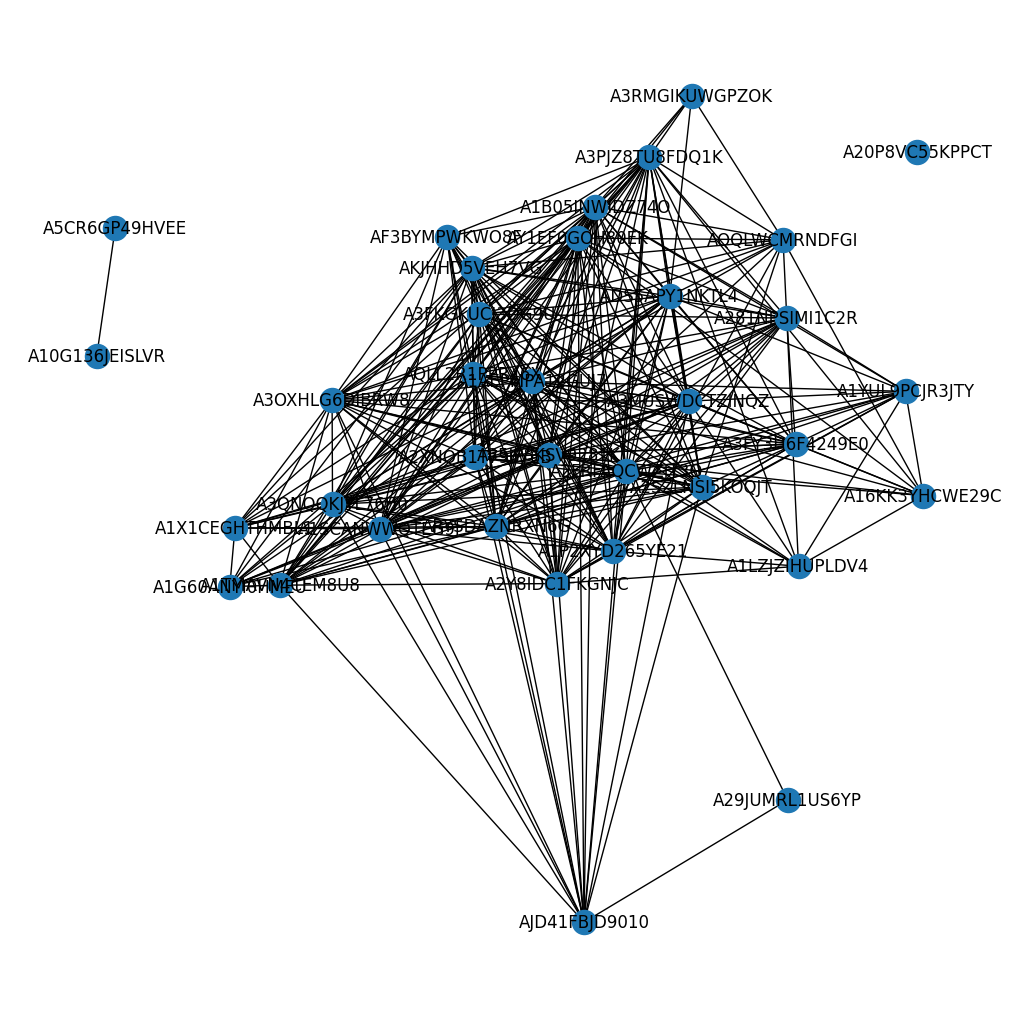

In [79]:
plt.figure(figsize=(10,10))
users = nx.from_pandas_adjacency(userId_pivot)
nx.draw_spring(users,with_labels=True)

In [80]:
productId_pivot = np.matmul(result.T, result)

productId_pivot.columns = result.columns
for x in result.columns:
    productId_pivot.loc[x,x]=0

C:\Users\sahin\AppData\Local\Temp\ipykernel_13276\3102601650.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  productId_pivot = np.matmul(result.T, result)


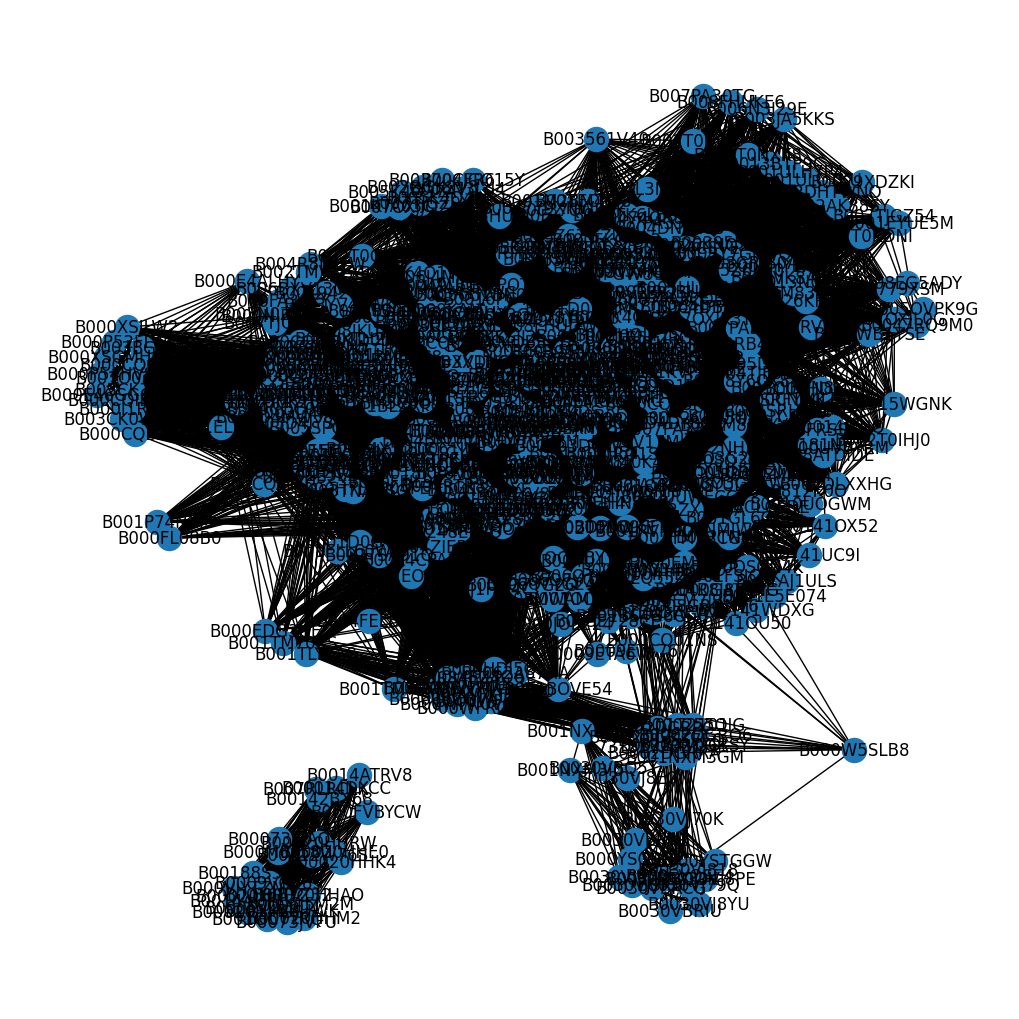

In [81]:
plt.figure(figsize=(10,10))
products = nx.from_pandas_adjacency(productId_pivot)
nx.draw_spring(products, with_labels=True)

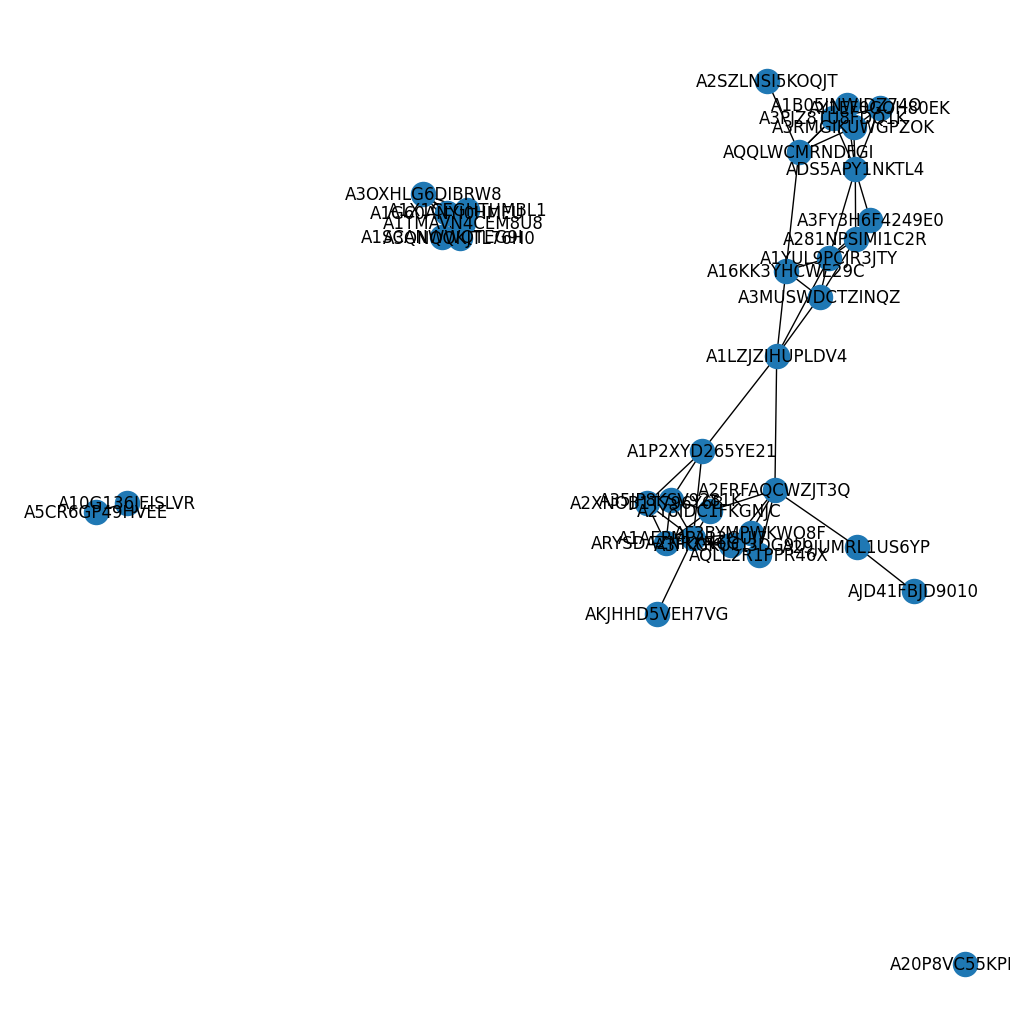

In [82]:
plt.figure(figsize=(10,10))
th_users = nx.from_pandas_adjacency(np.round(userId_pivot*90, 0))
nx.draw_spring(th_users, with_labels=True)

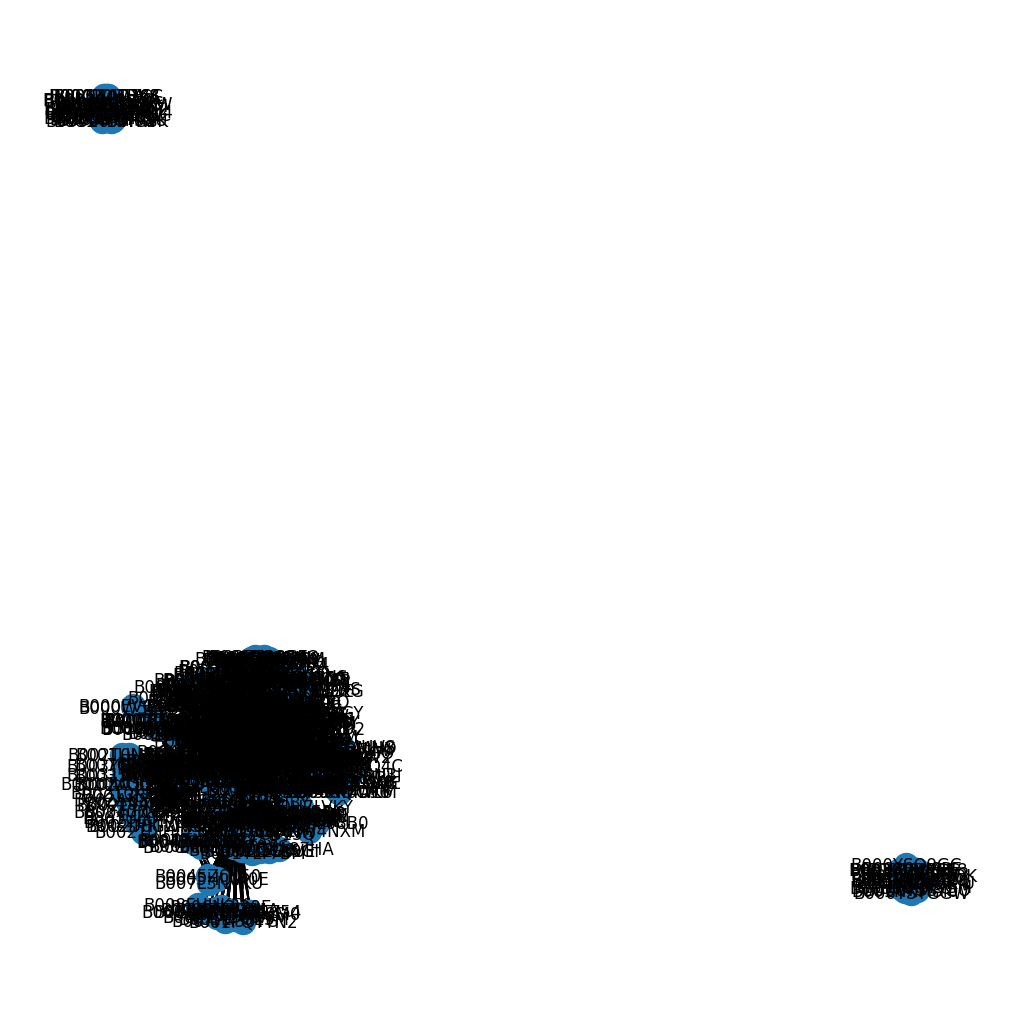

In [83]:
plt.figure(figsize=(10,10))
th_products = nx.from_pandas_adjacency(np.round(productId_pivot*2300, 0))
nx.draw_spring(th_products, with_labels=True)

## Q2

For this question we are going to use the audio track of the following [YouTube video](https://www.youtube.com/watch?v=VHoT4N43jK8). I downloaded the audio track for you locally [here](./data/stromae_alors_on_danse.opus)

In [84]:
raw, fr = librosa.load('./data/data_stromae_alors_on_danse.oga', mono=True, duration=30)
song = raw[350000:5000000]
song.shape

(311500,)

In [85]:
Audio(song, rate=fr)

**Step 1:** Create a chromagram for the audio.

**Step 2:** Round the resulting matrix using `np.round` with rounding parameter `0`.

**Step 3:** The result is a matrix of size (12,9083). The number of rows correspond to the notes in an octave: "C","C#","D","D#","E","F","F#","G","G#","A","A#","B".

**Step 4:** Count the number of each note using the result of Step 3, and sketch a histogram.

**Step 5:** What are the top 5 notes appearing in the song?

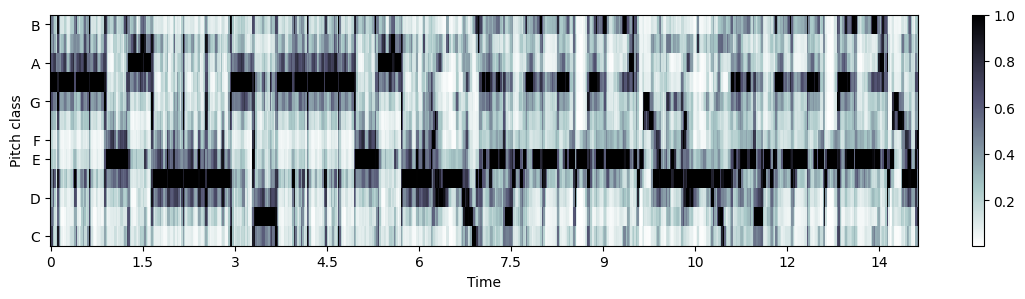

In [86]:
song_chromagram = librosa.feature.chroma_stft(y=song, sr=fr)

plt.figure(figsize=(14, 3))
librosa.display.specshow(song_chromagram, x_axis='time', y_axis='chroma', cmap='bone_r')
plt.colorbar()

In [87]:
song_chromagram.size

# veriyi sizin yazdiginiz gibi yuklemeye calistigimda hata aldim ve farkli bir sekilde yapmam gerekti
# bu yuzden matrisimin buyuklugu farkli

7308

In [88]:
notes = ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]

note_count = np.round(song_chromagram, 0).sum(axis = 1).astype(np.int)

note_count_df = pd.DataFrame(note_count, index=notes, columns=['count'])

C:\Users\sahin\AppData\Local\Temp\ipykernel_13276\3865824382.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  note_count = np.round(song_chromagram, 0).sum(axis = 1).astype(np.int)


Text(0.5, 1.0, 'The number of each note')

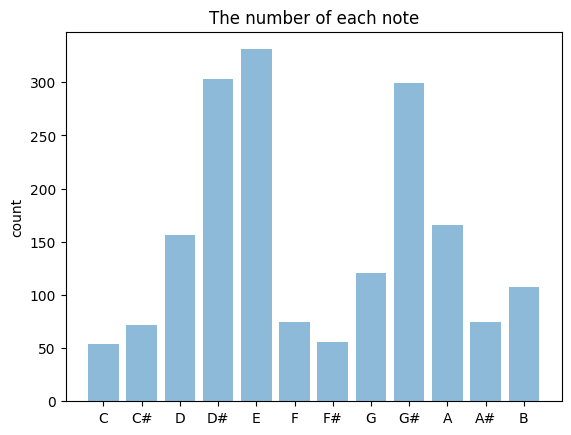

In [89]:
plt.bar(np.arange(len(notes)), note_count, align='center', alpha=0.5)
plt.xticks(np.arange(len(notes)), notes)
plt.ylabel('count')
plt.title('The number of each note')

In [90]:
note_count_df.sort_values(by=['count'], ascending=False)[0:5]

,count
E,331
D#,303
G#,299
A,166
D,156


Top 5 notes appearing in the song (first x seconds): 
- E
- D#
- G#
- A
- D